In [44]:
# MOVIE GENRE PREDICTION MODEL
# BY ARUSH JAUHARI
import pandas as pd
import numpy as np
train_data=pd.read_csv("train_data.txt",sep=':::',names=['ID','Title','Genre','Summary'],engine='python')
test_data=pd.read_csv("test_data.txt",sep=':::',names=['ID','Title','Summary'],engine='python')
print(train_data.head())
test_data.head()

   ID                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                             Summary  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  


,ID,Title,Summary
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [45]:
print(train_data.shape)
print(test_data.shape)
print(train_data.isnull())
print(train_data.isnull().sum())

(1603, 4)
(1618, 3)
         ID  Title  Genre  Summary
0     False  False  False    False
1     False  False  False    False
2     False  False  False    False
3     False  False  False    False
4     False  False  False    False
...     ...    ...    ...      ...
1598  False  False  False    False
1599  False  False  False    False
1600  False  False  False    False
1601  False  False  False    False
1602  False  False  False    False

[1603 rows x 4 columns]
ID         0
Title      0
Genre      0
Summary    0
dtype: int64


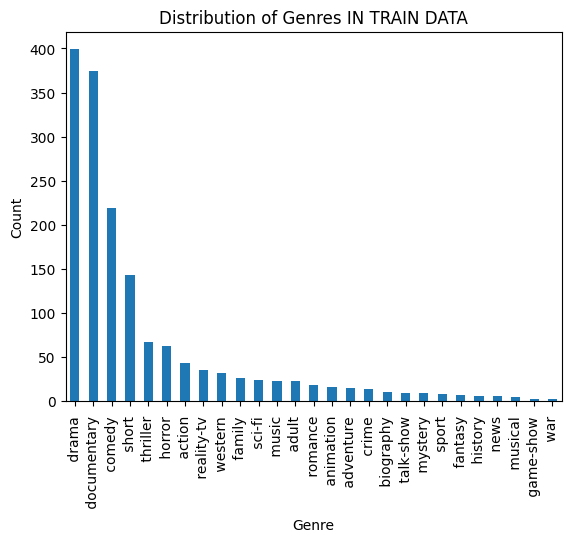

In [46]:
import matplotlib.pyplot as plt
train_data['Genre'].value_counts().plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Genres IN TRAIN DATA')
plt.show()


In [47]:
!python -m nltk.downloader stopwords

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [48]:
!python -m nltk.downloader punkt

/usr/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [49]:
#clean data
# cleaning the data using nltk library
from nltk import LancasterStemmer
import re
import nltk
from nltk.corpus import stopwords
stemmer = LancasterStemmer()
stop_words_set = set(stopwords.words('english'))
def clean_data(data):
  data=data.upper()
  data=re.sub(r'[^a-zA-Z]',' ',data)
  data = re.sub(r'\s+@\s+','',data)
  data = re.sub(r'http\S+', '',data)
  data=re.sub(r'@\s+','',data)
  words = nltk.word_tokenize(data)
  data=[stemmer.stem(word) for word in words if word.lower() not in stop_words_set]
  data=' '.join(data)
  return data
train_data['Clean text']=train_data['Summary'].apply(clean_data)
# test_data['Clean text']=test_data['Summary'].apply(clean_data)

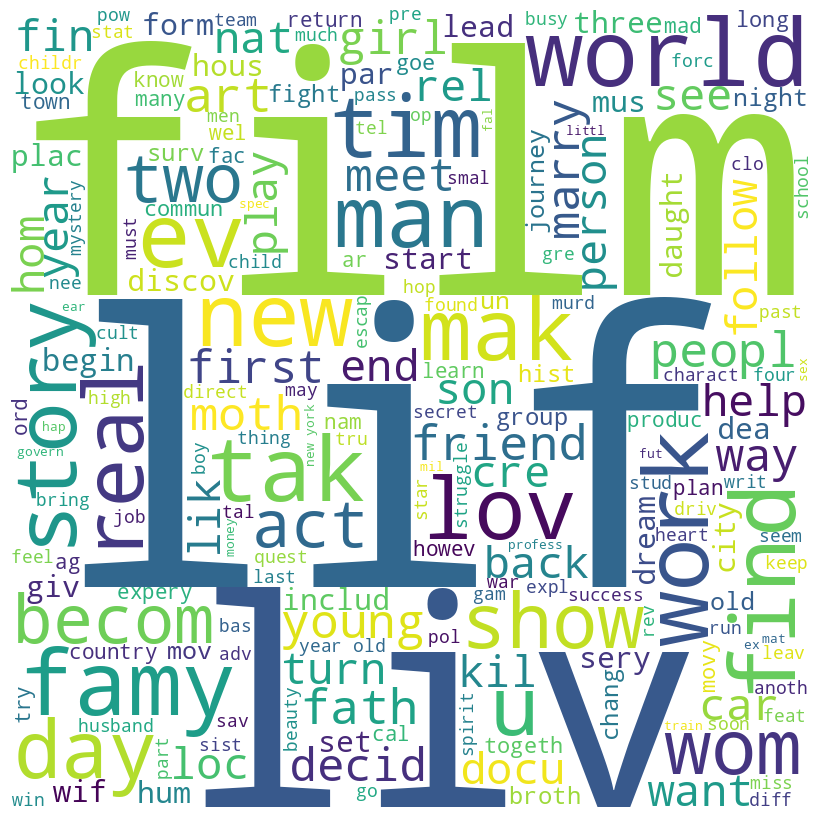

In [50]:
from wordcloud import WordCloud, STOPWORDS
text = ' '.join(train_data['Clean text'])
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = STOPWORDS,
                min_font_size = 10).generate(text)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()
# shows the most FREQUENT WORDS IN OUR DATASET

In [51]:
train_data.head()

,ID,Title,Genre,Summary,Clean text
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,list convers doct par year old osc learn nobod...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,broth sist past incestu rel cur murd rel murd ...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empty stud field trip muse nat hist littl ...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemploy fath mak end meet edi twin sist ...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film titl ref un recov body ground zero also s...


In [52]:

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector = TfidfVectorizer()

# Fit and transform the training data
X_train = tfidf_vector.fit_transform(train_data['Clean text'])

print(X_train.shape)
print(X_train.toarray())

(1603, 10987)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
X = X_train
y = train_data['Genre']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3,random_state=42)
# Initialize and train a SUPPORT VECTOR MACHINE
model = SVC(kernel='linear')
model.fit(X_train1, y_train1)

# Make predictions on THE DATA SET
y_pred = model.predict(X_test1)
# PERFORMANCE VALIDATION
accuracy = accuracy_score(y_test1, y_pred)
print("Validation Accuracy:", accuracy)
print(classification_report(y_test1, y_pred))
y_pred

Validation Accuracy: 0.41995841995842
               precision    recall  f1-score   support

      action        0.00      0.00      0.00        14
       adult        0.00      0.00      0.00         7
   adventure        0.00      0.00      0.00         7
   animation        0.00      0.00      0.00         4
   biography        0.00      0.00      0.00         2
      comedy        0.37      0.18      0.24        62
       crime        0.00      0.00      0.00         4
 documentary        0.47      0.83      0.60       112
       drama        0.38      0.83      0.52       116
      family        0.00      0.00      0.00         8
     fantasy        0.00      0.00      0.00         1
      horror        1.00      0.05      0.10        19
       music        0.00      0.00      0.00         6
     musical        0.00      0.00      0.00         1
     mystery        0.00      0.00      0.00         2
        news        0.00      0.00      0.00         4
  reality-tv        0.00  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([' documentary ', ' documentary ', ' drama ', ' documentary ',
       ' drama ', ' drama ', ' drama ', ' documentary ', ' documentary ',
       ' documentary ', ' drama ', ' comedy ', ' drama ', ' documentary ',
       ' drama ', ' drama ', ' horror ', ' drama ', ' drama ', ' drama ',
       ' drama ', ' documentary ', ' comedy ', ' drama ', ' drama ',
       ' drama ', ' drama ', ' documentary ', ' drama ', ' drama ',
       ' documentary ', ' documentary ', ' documentary ', ' documentary ',
       ' drama ', ' drama ', ' drama ', ' documentary ', ' drama ',
       ' drama ', ' drama ', ' documentary ', ' drama ', ' comedy ',
       ' documentary ', ' documentary ', ' drama ', ' documentary ',
       ' drama ', ' drama ', ' documentary ', ' drama ', ' drama ',
       ' documentary ', ' drama ', ' drama ', ' drama ', ' drama ',
       ' documentary ', ' drama ', ' comedy ', ' drama ', ' documentary ',
       ' drama ', ' documentary ', ' drama ', ' drama ', ' drama ',
       ' dr

In [54]:

#WORKING WITH THE GIVEN TEST DATA AND PREDICTING GENRE
test_data.head()
test_data["clean_text"]=test_data["Summary"].apply(clean_data)
test_data.head()
test_data1=tfidf_vector.transform(test_data["clean_text"])
test_data1
test_data["genre"]=model.predict(test_data1)
print(test_data.head())


   ID                          Title  \
0   1          Edgar's Lunch (1998)    
1   2      La guerra de papá (1977)    
2   3   Off the Beaten Track (2010)    
3   4        Meu Amigo Hindu (2015)    
4   5             Er nu zhai (1955)    

                                             Summary  \
0   L.R. Brane loves his life - his car, his apar...   
1   Spain, March 1964: Quico is a very naughty ch...   
2   One year in the life of Albin and his family ...   
3   His father has died, he hasn't spoken with hi...   
4   Before he was known internationally as a mart...   

                                          clean_text          genre  
0  l r bran lov lif car apart job espec girlfrien...         drama   
1  spain march quico naughty child three belong w...         drama   
2  on year lif albin famy shepherd nor transylvan...   documentary   
3  fath died spok broth year sery cant diego tal ...         drama   
4  known intern mart art superst bruc lee appear ...         drama   


In [55]:
# testing the accuracy of the tested data set

# reading the testdata solutions file
test_solution=pd.read_csv("test_data_solution.txt",sep=':::',names=['ID','Title','Genre','Summary'],engine='python')
print(test_solution.head())
print(test_solution.shape)
print(test_data.shape)
test_data_subset=test_data.iloc[:1587]         # make the rows equivalent

print(test_data_subset.shape)
accuracy1=accuracy_score(test_solution['Genre'],test_data_subset['genre'])
print(accuracy1)

   ID                          Title          Genre  \
0   1          Edgar's Lunch (1998)       thriller    
1   2      La guerra de papá (1977)         comedy    
2   3   Off the Beaten Track (2010)    documentary    
3   4        Meu Amigo Hindu (2015)          drama    
4   5             Er nu zhai (1955)          drama    

                                             Summary  
0   L.R. Brane loves his life - his car, his apar...  
1   Spain, March 1964: Quico is a very naughty ch...  
2   One year in the life of Albin and his family ...  
3   His father has died, he hasn't spoken with hi...  
4   Before he was known internationally as a mart...  
(1587, 4)
(1618, 5)
(1587, 5)
0.45368620037807184


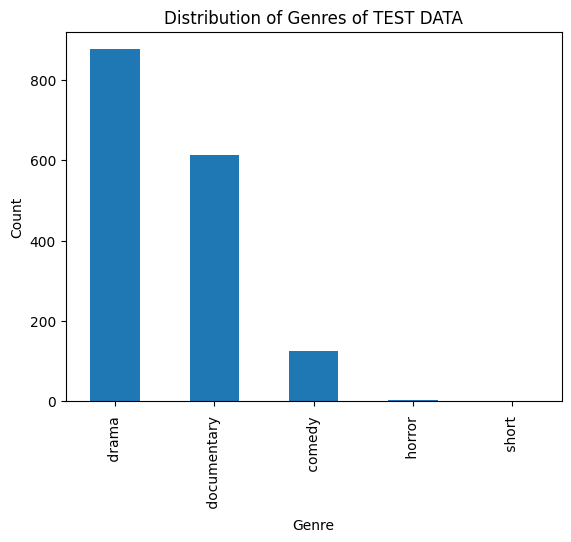

In [56]:
# plotting the grapgh

test_data['genre'].value_counts().plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Distribution of Genres of TEST DATA')
plt.show()
